# Airline Passenger Satisfaction Analysis using Machine Learning Techniques


### 1) Load required modules

In [1]:
# import 'os'
import  os

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import 'matplotlib.pyplot' 
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to suppress the notation 'e'    
pd.options.display.float_format = '{:.6f}'.format

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split

from   sklearn.preprocessing    import  OrdinalEncoder
from   sklearn.preprocessing    import  LabelEncoder
labelencoder = LabelEncoder()

In [2]:
import time
from    datetime   import datetime
from    datetime   import timedelta

In [3]:
# Figure size
sns.set(rc={'figure.figsize':(10,10)}) #width=10, #height=10

In [4]:
# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api                        as      sm
import statsmodels.stats.api                  as      sms
import statsmodels.formula.api                as      smf

from    statsmodels.tools.eval_measures       import   rmse
from    statsmodels.compat                    import   lzip
from    statsmodels.stats.outliers_influence  import   variance_inflation_factor
from    statsmodels.stats.diagnostic          import   linear_rainbow

import  statsmodels.tsa.api                   as       smt
from    statsmodels.graphics.gofplots         import   qqplot
from    statsmodels.stats.stattools           import   durbin_watson

# 'SciPy' is used to perform scientific computations
from    scipy                                 import   stats
from    scipy.stats                           import   shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from    sklearn.metrics                       import   mean_absolute_error
from    sklearn.metrics                       import   mean_squared_error


In [5]:
### Imputing missing numerical values using the IterativeImputer class in sklearn 

from sklearn.experimental  import   enable_iterative_imputer
from sklearn.impute        import   IterativeImputer
from sklearn.linear_model   import   LinearRegression

### https://www.numpyninja.com/post/mice-and-knn-missing-value-imputations-through-python

In [6]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero & Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero & Missing Values'] = 100 * mz_table['Total Zero & Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

**ATTRIBUTES**

| SNo | Column Name | Descrption |
| --- | -------------------- | --------------------------------|
|  1 | SR | Serial Number |
|  2 | Id | Id number of the passengers |
|  3 | Gender | Gender of the passengers (Female, Male)  |
|  4 | Customer Type | The customer type (Loyal customer, disloyal customer) |
|  5 | Age | The actual age of the passengers |
|  6 | Type of Travel | Purpose of the flight of the passengers (Personal Travel, Business Travel)  |
|  7 | Class | Travel class in the plane of the passengers (Business, Eco, Eco Plus) |  
|  8 | Flight Distance  | The flight distance of this journey |
|  9 | Inflight wifi service  | Satisfaction level of the inflight wifi service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)  |
|  10 | Departure/Arrival time convenient  | Satisfaction level of Departure/Arrival time convenient (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)  |
| 11 | Ease of Online booking  | Satisfaction level of online booking (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied) |
| 12 | Gate location | Satisfaction level of Gate location (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied) |
| 13 | Food and drink | Satisfaction level of Food and drink service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied) |
| 14 | Online boarding | Satisfaction level of online boarding (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied) |
| 15 | Seat comfort | Satisfaction level of Seat comfort (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied) |
| 16 | Inflight entertainment  | Satisfaction level of inflight entertainment (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied) |   
| 17 | On-board service | Satisfaction level of On-board service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied) |   
| 18 | Leg room service | Satisfaction level of Leg room service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied) | 
| 19 | Baggage handling | Satisfaction level of baggage handling (1,2,3,4,5/ 1=Least Satisfied to 5=Most Satisfied)  |  
| 20 | Checkin service | Satisfaction level of Check-in service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied) | 
| 21 | Inflight service | Satisfaction level of inflight service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied) | 
| 22 | Cleanliness | Satisfaction level of Cleanliness (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied) | 
| 23 | Departure Delay in Minutes | Minutes delayed when departure |
| 24 | Arrival Delay in Minutes | Minutes delayed when arrival |
| 25 | Satisfaction | Airline satisfaction level ('satisfied', 'neutral or dissatisfied') |


#### 2) Read data file

In [7]:
folder     =    r'G:\DSE-Capstone\DSE-Online-Jan22'
os.chdir(folder)

In [8]:
## file_name   =  './Data/airline_clnd.csv'

file_name   =  r'G:\DSE-Capstone\DSE-Online-Jan22\Data\airline_clnd.csv'

In [9]:
airline_passenger_satisfaction = pd.read_csv(file_name)
airline_passenger_satisfaction.head().T

,0,1,2,3,4
SR,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer_Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type_of_Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight_Distance,460,235,1142,562,214
Inflight_wifi_service,3,3,2,2,3
Departure/Arrival_time_convenient,4,2,2,5,3


### Find and report missing values

In [10]:
missing_zero_values_table(airline_passenger_satisfaction)

Your selected dataframe has 25 columns and 103904 Rows.
There are 1 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero & Missing Values,% Total Zero & Missing Values,Data Type
Arrival_Delay_in_Minutes,58159,310,0.300000,58469,56.300000,float64


In [11]:
df            =    airline_passenger_satisfaction.copy()

In [12]:
df['satisfaction'].replace('neutral or dissatisfied', 1, inplace = True)
df['satisfaction'].replace('satisfied', 0, inplace = True)

In [13]:
ord_enc                                             = OrdinalEncoder()

In [14]:
df['Gender_code']          = ord_enc.fit_transform(df[['Gender']])
df['Customer_Type_code']   = ord_enc.fit_transform(df[['Customer_Type']])
df['Type_of_Travel_code']  = ord_enc.fit_transform(df[['Type_of_Travel']])
df['Class_code']           = ord_enc.fit_transform(df[['Class']])

In [15]:
num_variables_df = df.select_dtypes(include = 'number')
print(num_variables_df.shape)
print(num_variables_df.columns)

(103904, 25)
Index(['SR', 'id', 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction', 'Gender_code', 'Customer_Type_code',
       'Type_of_Travel_code', 'Class_code'],
      dtype='object')


In [16]:
lreg         =  LinearRegression()
imp          =  IterativeImputer(estimator= lreg, missing_values = np.nan, max_iter = 10, verbose = 2,\
                                 imputation_order= 'roman',random_state = 0)
X            =  imp.fit_transform(num_variables_df)

[IterativeImputer] Completing matrix with shape (103904, 25)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.92
[IterativeImputer] Change: 432.36012114619695, scaled tolerance: 129.88 
[IterativeImputer] Ending imputation round 2/10, elapsed time 3.85
[IterativeImputer] Change: 0.0, scaled tolerance: 129.88 
[IterativeImputer] Early stopping criterion reached.


In [17]:
X_df           =    pd.DataFrame(X, columns = ['SR', 'id', 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction', 'Gender_code', 'Customer_Type_code',
       'Type_of_Travel_code', 'Class_code'])

In [18]:
missing_zero_values_table(X_df)  

Your selected dataframe has 25 columns and 103904 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero & Missing Values,% Total Zero & Missing Values,Data Type


In [19]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   SR                                 103904 non-null  float64
 1   id                                 103904 non-null  float64
 2   Age                                103904 non-null  float64
 3   Flight_Distance                    103904 non-null  float64
 4   Inflight_wifi_service              103904 non-null  float64
 5   Departure/Arrival_time_convenient  103904 non-null  float64
 6   Ease_of_Online_booking             103904 non-null  float64
 7   Gate_location                      103904 non-null  float64
 8   Food_and_drink                     103904 non-null  float64
 9   Online_boarding                    103904 non-null  float64
 10  Seat_comfort                       103904 non-null  float64
 11  Inflight_entertainment             1039

In [20]:
X_df.head().T

,0,1,2,3,4
SR,0.000000,1.000000,2.000000,3.000000,4.000000
id,70172.000000,5047.000000,110028.000000,24026.000000,119299.000000
Age,13.000000,25.000000,26.000000,25.000000,61.000000
Flight_Distance,460.000000,235.000000,1142.000000,562.000000,214.000000
Inflight_wifi_service,3.000000,3.000000,2.000000,2.000000,3.000000
Departure/Arrival_time_convenient,4.000000,2.000000,2.000000,5.000000,3.000000
Ease_of_Online_booking,3.000000,3.000000,2.000000,5.000000,3.000000
Gate_location,1.000000,3.000000,2.000000,5.000000,3.000000
Food_and_drink,5.000000,1.000000,5.000000,2.000000,4.000000
Online_boarding,3.000000,3.000000,5.000000,2.000000,5.000000


In [21]:
int_type_cols = ['SR', 'id', 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'satisfaction', 'Gender_code', 'Customer_Type_code',
       'Type_of_Travel_code', 'Class_code']
X_df[int_type_cols] = X_df[int_type_cols].astype(int)
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   SR                                 103904 non-null  int32  
 1   id                                 103904 non-null  int32  
 2   Age                                103904 non-null  int32  
 3   Flight_Distance                    103904 non-null  int32  
 4   Inflight_wifi_service              103904 non-null  int32  
 5   Departure/Arrival_time_convenient  103904 non-null  int32  
 6   Ease_of_Online_booking             103904 non-null  int32  
 7   Gate_location                      103904 non-null  int32  
 8   Food_and_drink                     103904 non-null  int32  
 9   Online_boarding                    103904 non-null  int32  
 10  Seat_comfort                       103904 non-null  int32  
 11  Inflight_entertainment             1039

<AxesSubplot:xlabel='index', ylabel='satisfaction'>

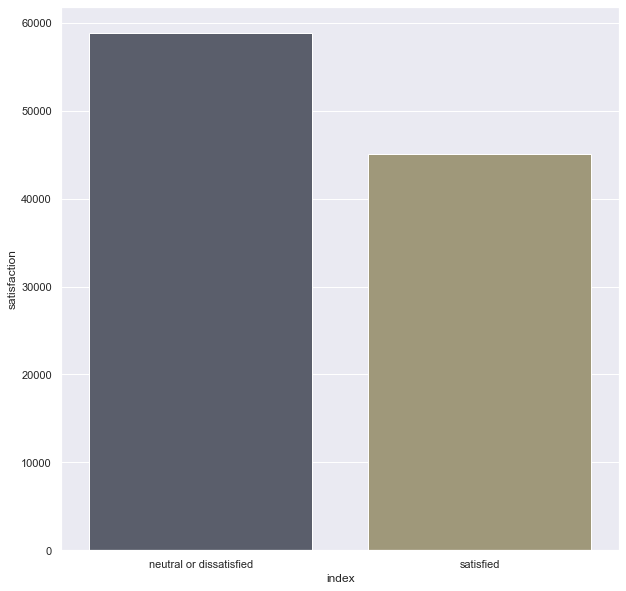

In [22]:
vc  =  airline_passenger_satisfaction['satisfaction'].value_counts().reset_index()
sns.barplot(x = 'index', y = 'satisfaction', data = vc,  palette = 'cividis')

### Observations

##### Dataset is not perfectly balanced. We need to use Precision, Recall of the minority class apart from AUROC as performance measures

### Prepare the dataset for building models

In [23]:
transformed_data_filename       =   './Output/transformed-data-' + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + '.csv'
X_df.to_csv(transformed_data_filename, index = False)

### 3) Prepare data for EDA 

#### Replace imputed values for the column, satisfaction before  doing EDA

In [24]:
X_df['satisfaction'].replace(1, 'neutral or dissatisfied', inplace = True)
X_df['satisfaction'].replace(0, 'satisfied', inplace = True)

In [25]:
airline_passenger_satisfaction['satisfaction']  =   X_df['satisfaction']

### Create a file containing the full data containing imputed data as well

In [26]:
imputed_data_filename       =  r'G:\DSE-Capstone\DSE-Online-Jan22\Output\airline_passenger_satisfaction-' + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + '.csv'
airline_passenger_satisfaction.to_csv(imputed_data_filename, index = False)

In [27]:
os.getcwd()

'G:\\DSE-Capstone\\DSE-Online-Jan22'